In [3]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('../spam.csv',encoding='latin-1')

In [5]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df['Unnamed: 2'].value_counts()

Unnamed: 2
 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
this wont even start........ Datz confidence.."                                                                                                     2
 PO Box 5249                                                                                                                                        2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
GN                                                                                                                                                  2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\""                                 

In [7]:
df['Unnamed: 3'].value_counts()

Unnamed: 3
 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: count, dtype: int64

In [8]:
df['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [9]:
df['Unnamed: 2'].replace(np.nan, '', inplace=True)
df['Unnamed: 3'].replace(np.nan, '', inplace=True)
df['Unnamed: 4'].replace(np.nan, '', inplace=True)

In [10]:
def Concate_column(row):
    return str(row['message']) + str(row['Unnamed: 2']) + str(row['Unnamed: 3']) + str(row['Unnamed: 4'])

In [11]:
df['New_Concat_MSG'] = df.apply(Concate_column , axis = 1)

In [12]:
df.drop(['Full_Messages','Full_Messages2','New','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True,errors='ignore')

In [13]:
df.head()

,class,message,New_Concat_MSG
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


# We concat the Messages Into one Column Called New_Concat_MSG

<Axes: xlabel='class'>

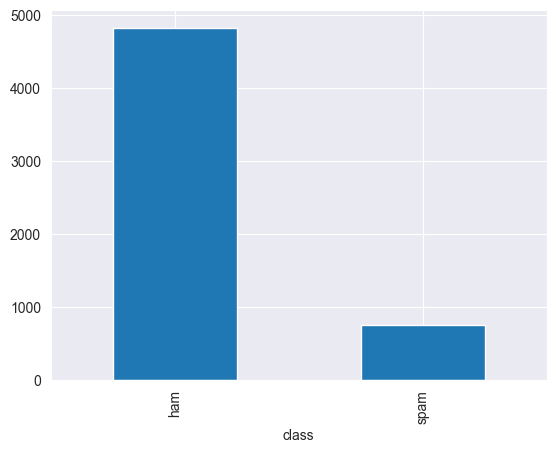

In [14]:
# Showing the Values of Class
df['class'].value_counts().plot(kind='bar')

# it Shows the Class Column is Unbalanced

In [15]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [17]:
stemmer = PorterStemmer()

In [18]:
def preprocessing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.split()
    text =[stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text
    # Remove symbols


In [19]:
df['Preprocessing_Msg'] = df['New_Concat_MSG'].apply(preprocessing)

# This for Converting the Text into Numbers

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Preprocessing_Msg'])  # or TfidfVectorizer()

In [21]:
"""
Encoding the Column
"""
y = pd.get_dummies(df['class'], drop_first = True)

In [22]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# The
from imblearn.over_sampling import SMOTE, ADASYN

In [25]:
smote = SMOTE()
x_train , y_train = smote.fit_resample(x_train, y_train)

In [26]:
y_train

,spam
0,False
1,True
2,False
3,False
4,True
...,...
7715,True
7716,True
7717,True
7718,True


In [27]:
from sklearn.utils.class_weight import  compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y = y_train)

ValueError: classes should include all valid labels that can be in y

In [184]:
class_weights

array([0.57740933, 3.72958501])

# Modeling

In [200]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [201]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [202]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [203]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , confusion_matrix ,precision_score, recall_score ,f1_score

## Multinomial

In [204]:
pred = nb.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,pred)} , recall : {recall_score(y_test,pred)} ,precision : {precision_score(y_test,pred)}")

Accuracy: 0.9739910313901345 , recall : 0.9466666666666667 ,precision : 0.8711656441717791


## Decision Tree

In [205]:
pred = dt.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,pred)} , recall : {recall_score(y_test,pred)} ,precision : {precision_score(y_test,pred)}")

Accuracy: 0.9730941704035875 , recall : 0.8533333333333334 ,precision : 0.9411764705882353


## Logistic Regression

In [207]:
pred = lr.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,pred)} , recall : {recall_score(y_test,pred)} ,precision : {precision_score(y_test,pred)}")

Accuracy: 0.979372197309417 , recall : 0.86 ,precision : 0.9847328244274809


## RandomForest

In [208]:
pred = rf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,pred)} , recall : {recall_score(y_test,pred)} ,precision : {precision_score(y_test,pred)}")

Accuracy: 0.9766816143497757 , recall : 0.8266666666666667 ,precision : 1.0


# Saving The models

In [209]:
pickle.dump(nb, open('nb.pkl', 'wb'))

In [210]:
pickle.dump(dt, open('dt.pkl', 'wb'))
pickle.dump(rf, open('rf.pkl', 'wb'))
pickle.dump(lr, open('lr.pkl', 'wb'))

In [2]:
! pip freeze > requirement.txt